Source of Data:
UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

Research paper basis: https://arxiv.org/abs/1806.01559

This code attempts to perform binary classification on the class column using a logit function (aka Logistic Regression Model)

 g = gamma (signal): 12332 || h = hadron (background): 6688 || Count acquired from the datadict of UCI repo || ROS to balance the data

In [ ]:
#pip install ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from ucimlrepo import fetch_ucirepo
magic_gamma_telescope = fetch_ucirepo(id=159)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets
print(magic_gamma_telescope.variables)
import matplotlib.pyplot as plt
%matplotlib inline

        name     role        type demographic  \
0    fLength  Feature  Continuous        None   
1     fWidth  Feature  Continuous        None   
2      fSize  Feature  Continuous        None   
3      fConc  Feature  Continuous        None   
4     fConc1  Feature  Continuous        None   
5      fAsym  Feature  Continuous        None   
6    fM3Long  Feature  Continuous        None   
7   fM3Trans  Feature  Continuous        None   
8     fAlpha  Feature  Continuous        None   
9      fDist  Feature  Continuous        None   
10     class   Target      Binary        None   

                                          description  units missing_values  
0                               major axis of ellipse     mm             no  
1                               minor axis of ellipse     mm             no  
2              10-log of sum of content of all pixels  #phot             no  
3       ratio of sum of two highest pixels over fSize   None             no  
4                   r

$$
\begin{gather*}
\text{logistic regression} \\
P = \frac{e^{+\beta X}}{1 + e^{+\beta X}}
\end{gather*}
$$

In [ ]:
X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [ ]:
X.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [ ]:
X.skew()

fLength     2.013652
fWidth      3.371628
fSize       0.875507
fConc       0.485888
fConc1      0.685695
fAsym      -1.046441
fM3Long    -1.123078
fM3Trans    0.120121
fAlpha      0.850890
fDist       0.229587
dtype: float64

<span style="color:red">

If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
If the skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If the skewness is less than -1 or greater than 1, the distribution is highly skewed. Since we have highly skewed data. We would need to perform Standard Scaling

</span>

In [105]:
y.head(-10)

,class
0,g
1,g
2,g
3,g
4,g
...,...
19005,h
19006,h
19007,h
19008,h


In [97]:
print("Count of unique",len(np.unique(y)))

Count of unique 2


In [ ]:
y = (y == "g").astype(int)
np.unique(y) # check one hot encoding, sometimes it fails

array([0, 1])

In [ ]:
data = pd.concat([X, y], axis=1) # append target var | DV
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [ ]:
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))]) # split 60% train, 20% test, 20% split using np.split

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)
  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
lg_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1352
           1       0.84      0.82      0.83      2452

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



<span style="color:red">Precision: Measures what proportion of instances the model predicted as positive (class 1) that were actually positive. The precision for class 0 is 0.69, which means that 69% of the instances predicted as class 0 were indeed class 0. The other class, has a precision of 85% of the instances predicted as class 1 were actually class 1.

Recall: This metric indicates what proportion of actual positive instances the model correctly identified. The recall for class 0 is 0.73, means the model correctly identified 73% of the actual class 0 instances. For class 1 recall is 0.82, suggesting the model correctly identified 82% of the actual class 1 instances.

F1-score: The harmonic mean of precision and recall, providing a single metric that balances both. A higher F1-score is better. For class 0, the F1-score is 0.71, and for class 1, it's 0.83.

Support: This column shows the number of instances for each class in the dataset. In this case, there were 1337 instances of class 0 and 2467 instances of class 1.

Accuracy: This is the overall accuracy of the model, calculated as the number of correct predictions divided by the total number of instances. In this case, the accuracy is 0.79, or 79%.
</span>

In [ ]:
# We also perform a confusion matrix metric test
# Classification vs confusion: confusion shows the actual and predicted counts of each class, classification shows the calculated metrics of each class

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 956  396]
 [ 434 2018]]


0.7818086225026288

<span style="color:red">The confusion matrix shows 956 instances of class 0 were correctly predicted as class 0
|| 396 instances of class 0 were incorrectly predicted as class 1
|| 434 instances of class 1 were incorrectly predicted as class 0
||
 2018 || The Last portion indicates a 78% model accuracy against our test set
 instances of class 1 were correctly predicted as class 1</span>

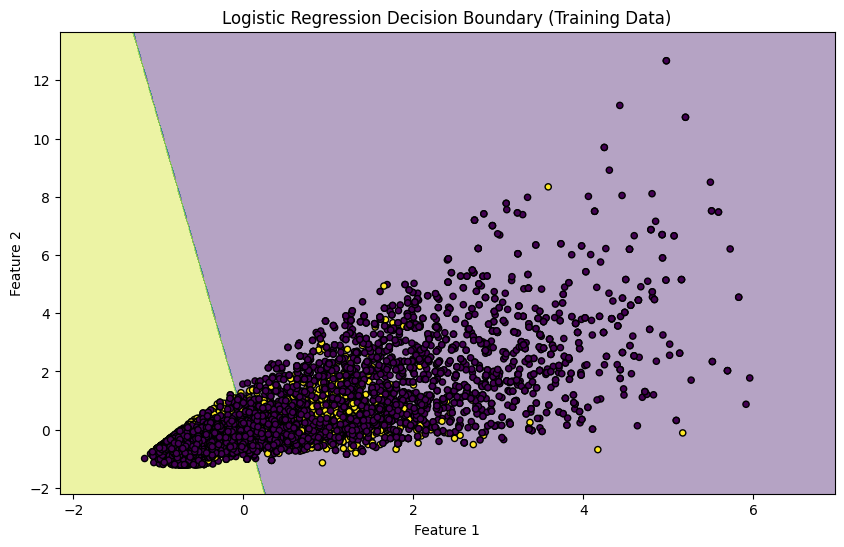

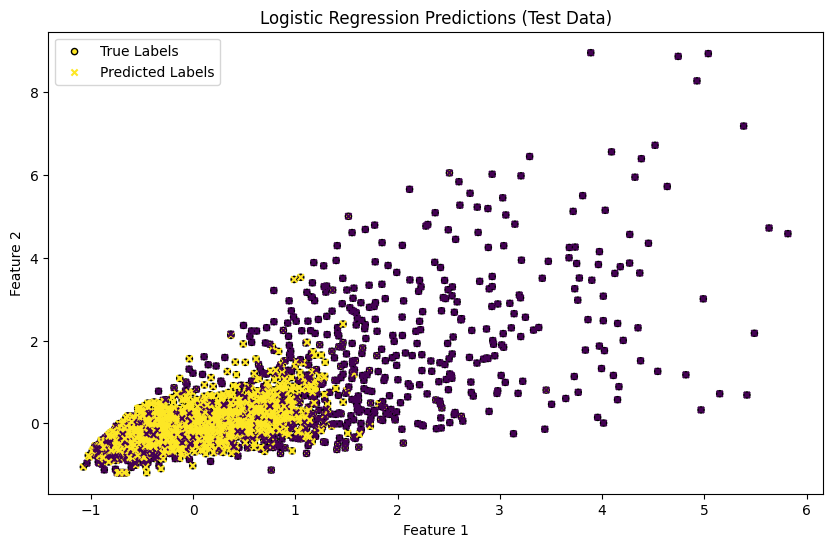

In [ ]:
import matplotlib.pyplot as plt


# Compute the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xset, yset = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = lg_model.predict(np.c_[xset.ravel(), yset.ravel(), np.zeros((xset.ravel().shape[0], 8))])  # Add 8 zeros for the remaining features - will have to check on this since it is a quick fix for LG model
Z = Z.reshape(xset.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xset, yset, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Training Data)')

# Plot the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20, edgecolor='k', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Predictions (Test Data)')
plt.legend(['True Labels', 'Predicted Labels'])

plt.show()
%matplotlib inline